<span style="font-family: Open Sans; font-weight: 800; font-size: 40px; font-style: normal; text-align:center;">

Especialización Inteligencia Artificial - CEIA

</span>

<span style="font-family: Open Sans; font-weight: 700; font-size: 30px; font-style: normal; text-align:center;">

Visión por Computadora I

Trabajo práctico Nro. I

</span>

<span style="font-family: Open Sans; font-weight: 400; font-size: 20px; font-style: normal;">




</span>

# Tabla de Contenido

1. [Consigna](#Consigna)<br>
2. [Parte I](#Parte-I)<br>
3. [Parte II](#Parte-II)<br>

# Consigna

▪ Parte I (imágenes en /white_patch y /coord_cromaticas):
1. Implementar el algoritmo de pasaje a coordenadas cromáticas para librarnos de las variaciones de contraste.
2. Implementar el algoritmo White Patch para librarnos de las diferencias de color de iluminación.
3. Mostrar los resultados obtenidos y analizar las posibles fallas (si es que las hay) en el caso de White patch.

▪ Parte II:
1. Para las imágenes img1_tp.png y img2_tp.png leerlas con OpenCV en escala de grisas y visualizarlas.
2. Elija el numero de bins que crea conveniente y grafique su histograma, compare los histogramas entre si.
Explicar lo que se observa, si tuviera que entrenar un modelo de clasificación/detección de imágenes,
considera que puede ser de utilidad tomar como ‘features’ a los histogramas?
3. Para la imagen segmentacion.png analice el histograma de los canales RGB. Segmente algunos de los
elementos presentes en la imagen (agua, cielo, tierra) y muestre, aplicando mascaras, las regiones en imágenes
separadas.

[inicio](#Tabla-de-contenido)

# Parte I

[inicio](#Tabla-de-contenido)

# Carga de imágenes

In [1]:
# Importamos librerías
%matplotlib inline  
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [2]:
# Cargamos las imágenes
img1 = cv.imread('material_TP1/coord_cromaticas/CoordCrom_1.png')
img2 = cv.imread('material_TP1/coord_cromaticas/CoordCrom_2.png')
img3 = cv.imread('material_TP1/coord_cromaticas/CoordCrom_3.png')


In [9]:
# Mostramos las imágenes en RGB para ver si se cargaron correctamente

cv.imshow('Imagen Original 1', img1)
cv.imshow('Imagen Original 2', img2)
cv.imshow('Imagen Original 3', img3)
cv.waitKey(0)
cv.destroyAllWindows()

# 1- Coordenadas cromáticas

In [4]:
# Generamos una función con el algoritmo de coordinadas cromáticas en función del promedio de los canales a y b

def coordenadas_cromaticas (img):
    
    # Convertimos la imagen de BGR a Lab
    img_lab = cv.cvtColor(img, cv.COLOR_BGR2Lab)
    
    # calculamos el promedio de los canalas a y b
    a_prom, b_prom = np.mean(img_lab[:, :, 1]), np.mean(img_lab[:, :, 2])
    
    # Ajustamos cada pixel de los canalas a y b según el promedio
    for y in range(img_lab.shape[0]):
        for x in range(img_lab.shape[1]):
            img_lab[y, x, 1] = np.clip(img_lab[y, x, 1] - a_prom + 128, 0, 255)
            img_lab[y, x, 2] = np.clip(img_lab[y, x, 2] - b_prom + 128, 0, 255)
            
    # Convertimos nuevamente a BGR
    img_coordCrom = cv.cvtColor(img_lab, cv.COLOR_Lab2BGR)
    
    return img_coordCrom

In [5]:
# Aplicamos el método del algoritmo a cada imagen
img_coordCrom_1 = coordenadas_cromaticas (img1)
img_coordCrom_2 = coordenadas_cromaticas (img2)
img_coordCrom_3 = coordenadas_cromaticas (img3)

In [6]:
# Mostramos las imágenes con el algoritmo aplicado
cv.imshow('Imagen - Coordenada cromática 1', img_coordCrom_1)
cv.imshow('Imagen - Coordenada cromática 2', img_coordCrom_2)
cv.imshow('Imagen - Coordenada cromática 3', img_coordCrom_3)
cv.waitKey(0)
cv.destroyAllWindows()

In [7]:
# Generamos una función con el algoritmo de coordinadas cromáticas ecualizando el canal L

def coordenadas_cromaticas_L (img):
    
    # Convertimos la imagen de BGR a Lab
    img_lab = cv.cvtColor(img, cv.COLOR_BGR2Lab)
    
    # Separamos los canales Lab
    L, a, b = cv.split(img_lab)
    
    # Ecualizamos el canal L
    L_eq = cv.equalizeHist(L)
    
    # Combinamos los canales Lab nuevamente
    img_eq = cv.merge([L_eq, a, b])

    # Convertimos nuevamente a BGR
    img_coordCrom = cv.cvtColor(img_eq, cv.COLOR_Lab2BGR)
    
    # Convertimos a RGB
    img_coordCrom = cv.cvtColor(img_coordCrom, cv.COLOR_BGR2RGB)
    
    return img_coordCrom

In [8]:
# Aplicamos el método del algoritmo a cada imagen
img_coordCrom_Eq_1 = coordenadas_cromaticas_L (img1)
img_coordCrom_Eq_2 = coordenadas_cromaticas_L (img2)
img_coordCrom_Eq_3 = coordenadas_cromaticas_L (img3)

In [9]:
# Mostramos las imágenes con el algoritmo aplicado
cv.imshow('Imagen - Coordenada cromática 1', img_coordCrom_Eq_1)
cv.imshow('Imagen - Coordenada cromática 2', img_coordCrom_Eq_2)
cv.imshow('Imagen - Coordenada cromática 3', img_coordCrom_Eq_3)
cv.waitKey(0)
cv.destroyAllWindows()

Mostramos y comparamos las imágenes

In [10]:
# Mostramos las imágenes con el algoritmo aplicado
cv.imshow('Imagen - Original', img1)
cv.imshow('Imagen - Coordenada cromática | Prom. color', img_coordCrom_1)
cv.imshow('Imagen - Coordenada cromática | Eq canal L', img_coordCrom_Eq_1)
cv.waitKey(0)
cv.destroyAllWindows()

In [11]:
# Mostramos las imágenes con el algoritmo aplicado
cv.imshow('Imagen - Original', img2)
cv.imshow('Imagen - Coordenada cromática | Prom. color', img_coordCrom_2)
cv.imshow('Imagen - Coordenada cromática | Eq canal L', img_coordCrom_Eq_2)
cv.waitKey(0)
cv.destroyAllWindows()

In [12]:
# Mostramos las imágenes con el algoritmo aplicado
cv.imshow('Imagen - Original', img3)
cv.imshow('Imagen - Coordenada cromática | Prom. color', img_coordCrom_3)
cv.imshow('Imagen - Coordenada cromática | Eq canal L', img_coordCrom_Eq_3)
cv.waitKey(0)
cv.destroyAllWindows()

# 2- White Patch

[inicio](#Tabla-de-contenido)

In [3]:
# Cargamos las imágenes

# Imagen 1
img1_blue = cv.imread('material_TP1/white_patch/test_blue.png')
img1_red = cv.imread('material_TP1/white_patch/test_red.png')
img1_green = cv.imread('material_TP1/white_patch/test_green.png')

# Imagen 2
img2_blue = cv.imread('material_TP1/white_patch/wp_blue.jpg')
img2_green1 = cv.imread('material_TP1/white_patch/wp_green.png')
img2_green2 = cv.imread('material_TP1/white_patch/wp_green2.jpg')
img2_red1 = cv.imread('material_TP1/white_patch/wp_red.png')
img2_red2 = cv.imread('material_TP1/white_patch/wp_red2.jpg')


In [9]:
# Mostramos para ver si se cargaron bien
cv.imshow('Imagen - Original', img1_blue)
cv.imshow('Imagen - Original', img1_red )
cv.imshow('Imagen - Original', img1_green)

cv.imshow('Imagen - Original', img2_blue)
cv.imshow('Imagen - Original', img2_green1)
cv.imshow('Imagen - Original', img2_green2)
cv.imshow('Imagen - Original', img2_red1)
cv.imshow('Imagen - Original', img2_red2)

cv.waitKey(0)
cv.destroyAllWindows()

In [52]:
# Generamos una función con el algoritmo White Patch

def white_patch (img):
    
    # Dividimos los canales
    b, g, r = cv.split(img)
    
    # Calculamos el valor máximo en cada canal
    max_b, max_g, max_r = max(np.max(b), 1), max(np.max(g), 1), max(np.max(r), 1)
    
    # Calculamos el factor de corrección para cada canal
    factor_b, factor_g, factor_r = max_b / b, max_g / g, max_r / r
    
    # Aplicamos el factor de corrección en cada canal
    b_corregido = np.clip(b * factor_b, 0, 255).astype(np.uint8)
    g_corregido = np.clip(g * factor_g, 0, 255).astype(np.uint8)
    r_corregido = np.clip(r * factor_r, 0, 255).astype(np.uint8)
    
    # Combinamos los canales
    img_corregida = cv.merge((b_corregido, g_corregido, r_corregido))
    img_corregida = img_corregida.astype(np.uint8)
    
    return img_corregida

In [53]:
# Implementamos el algoritmo de Whithe Patch a cada imagen

# Imagen 1
img1_blue_corregida = white_patch (img1_blue)
img1_red_corregida = white_patch (img1_red)
img1_green_corregida = white_patch (img1_green)

# Imagen 2
img2_blue_corregida = white_patch (img2_blue)
img2_green1_corregida = white_patch (img2_green1)
img2_green2_corregida = white_patch (img2_green2)
img2_red1_corregida = white_patch (img2_red1)
img2_red2_corregida = white_patch (img2_red2)

C:\Users\Martin\AppData\Local\Temp\ipykernel_17552\1850949345.py:12: RuntimeWarning: divide by zero encountered in divide
  factor_b, factor_g, factor_r = max_b / b, max_g / g, max_r / r
C:\Users\Martin\AppData\Local\Temp\ipykernel_17552\1850949345.py:15: RuntimeWarning: invalid value encountered in multiply
  b_corregido = np.clip(b * factor_b, 0, 255).astype(np.uint8)
C:\Users\Martin\AppData\Local\Temp\ipykernel_17552\1850949345.py:16: RuntimeWarning: invalid value encountered in multiply
  g_corregido = np.clip(g * factor_g, 0, 255).astype(np.uint8)
C:\Users\Martin\AppData\Local\Temp\ipykernel_17552\1850949345.py:17: RuntimeWarning: invalid value encountered in multiply
  r_corregido = np.clip(r * factor_r, 0, 255).astype(np.uint8)


Mostramos y Comparamos con su original

In [54]:
cv.imshow('Imagen Original', img1_blue)
cv.imshow('Imagen Corregida', img1_blue_corregida)
cv.waitKey(0)
cv.destroyAllWindows()

In [35]:
cv.imshow('Imagen Original', img1_red)
cv.imshow('Imagen Corregida', img1_red_corregida)
cv.waitKey(0)
cv.destroyAllWindows()

In [36]:
cv.imshow('Imagen Original', img1_green)
cv.imshow('Imagen Corregida', img1_green_corregida)
cv.waitKey(0)
cv.destroyAllWindows()

In [37]:
cv.imshow('Imagen Original', img2_blue)
cv.imshow('Imagen Corregida', img2_blue_corregida)
cv.waitKey(0)
cv.destroyAllWindows()

In [24]:
cv.imshow('Imagen Original', img2_green1)
cv.imshow('Imagen Corregida', img2_green1_corregida)
cv.waitKey(0)
cv.destroyAllWindows()

In [48]:
cv.imshow('Imagen Original', img2_green2)
cv.imshow('Imagen Corregida', img2_green2_corregida)
cv.waitKey(0)
cv.destroyAllWindows()

In [55]:
cv.imshow('Imagen Original', img2_red1)
cv.imshow('Imagen Corregida', img2_red1_corregida)
cv.waitKey(0)
cv.destroyAllWindows()

In [26]:
cv.imshow('Imagen Original', img2_red2)
cv.imshow('Imagen Corregida', img2_red2_corregida)
cv.waitKey(0)
cv.destroyAllWindows()

--------------------------------------

Es probable que el algoritmo de White Patch no haya funcionado debido a que algún píxel haya valido 255, lo que anularía la funcionalidad del algoritmo. 

# Parte II

[inicio](#Tabla-de-contenido)

Imagen 1

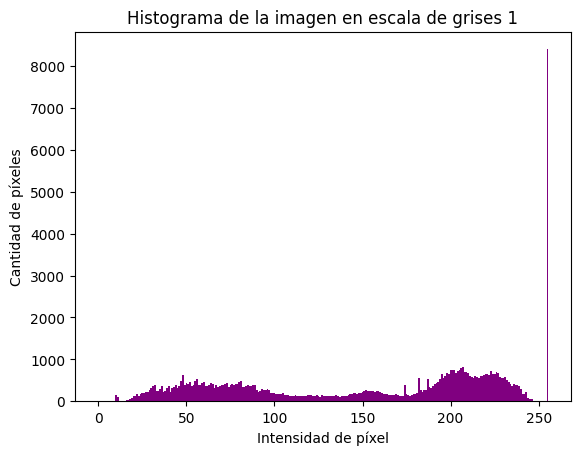

In [41]:
# Cargamos la imagen 1
img1_gray = cv.imread('material_TP1/img1_tp.png', cv.IMREAD_GRAYSCALE)

# Calculamos el histogramas con 256 bins
hist1,bins1 = np.histogram(img1_gray.ravel(),256,[0,256])

# Mostramos la imagen y el histograma
cv.imshow('Imagen Original 1 en grises', img1_gray)

plt.bar(bins1[:-1], hist1, width=1, color='purple')
plt.title('Histograma de la imagen en escala de grises 1')
plt.xlabel('Intensidad de píxel')
plt.ylabel('Cantidad de píxeles')
plt.show()

cv.waitKey(0)
cv.destroyAllWindows()

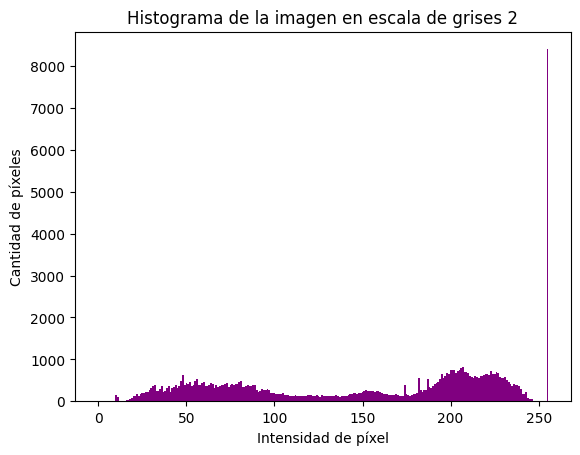

In [28]:
# Cargamos la imagen 2
img2_gray = cv.imread('material_TP1/img2_tp.png', cv.IMREAD_GRAYSCALE)

# Calculamos el histogramas con 256 bins
hist2,bins2 = np.histogram(img2_gray.ravel(),256,[0,256])

# Mostramos la imagen y el histograma
cv.imshow('Imagen Original 2 en grises', img2_gray)

plt.bar(bins2[:-1], hist2, width=1, color='purple')
plt.title('Histograma de la imagen en escala de grises 2')
plt.xlabel('Intensidad de píxel')
plt.ylabel('Cantidad de píxeles')
plt.show()

cv.waitKey(0)
cv.destroyAllWindows()

Se observa que los histogramas son iguales, esto se debe a que son 2 imágenes en escala de grises y al parecer la distribución de intensidad de píxeles son iguales.
Si tuviera que entrenar un modelo no consideraría de utilidad tomar como "features" a los histogramas ya que en casos como este no aportan información que ayude a la correcta clasificación.

# Punto 3

In [90]:
# Cargamos la imagen
img_seg = cv.imread('material_TP1/segmentacion.png')

# Calculamos el histogramas con 256 bins
hist_seg,bins_seg = np.histogram(img_seg.ravel(),256,[0,256])

# Mostramos la imagen
cv.imshow('Imagen Segmentación', img_seg)
cv.waitKey(0)
cv.destroyAllWindows()

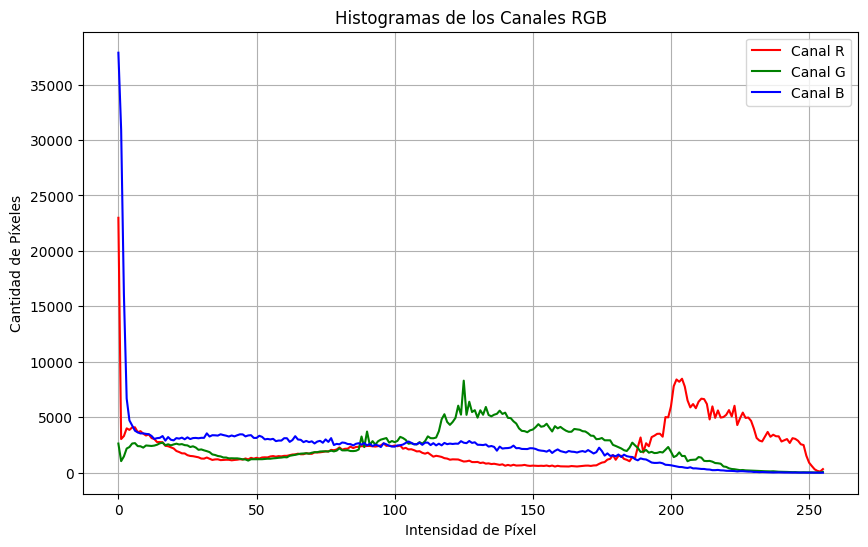

In [91]:
# Calculamos los histogramas de los canales por separado
histo_r = cv.calcHist([img_seg], [0], None, [256], [0, 256])
histo_g = cv.calcHist([img_seg], [1], None, [256], [0, 256])
histo_b = cv.calcHist([img_seg], [2], None, [256], [0, 256])

plt.figure(figsize=(10, 6))
plt.plot(histo_r, color='red', label='Canal R')
plt.plot(histo_g, color='green', label='Canal G')
plt.plot(histo_b, color='blue', label='Canal B')
plt.title("Histogramas de los Canales RGB")
plt.xlabel("Intensidad de Píxel")
plt.ylabel("Cantidad de Píxeles")
plt.legend()
plt.grid()
plt.show()

In [363]:
# Definimos los rangos de valores para segmentar

# Tierra
tierra_r_range = [0, 50]
tierra_g_range = [0, 150]
tierra_b_range = [0, 50]

# Agua
agua_r_range = [150, 200]
agua_g_range = [150, 200]
agua_b_range = [150, 200] 

# Cielo
cielo_r_range = [180, 255]
cielo_g_range = [120, 170]
cielo_b_range = [50, 255] 

In [364]:
# Aplicamos las máscaras
m_agua = cv.inRange(img_seg, (agua_r_range[0], agua_g_range[0], agua_b_range[0]), (agua_r_range[1], agua_g_range[1], agua_b_range[1]))
m_cielo = cv.inRange(img_seg, (cielo_r_range[0], cielo_g_range[0], cielo_b_range[0]), (cielo_r_range[1], cielo_g_range[1], cielo_b_range[1]))
m_tierra = cv.inRange(img_seg, (tierra_r_range[0], tierra_g_range[0], tierra_b_range[0]), (tierra_r_range[1], tierra_g_range[1], tierra_b_range[1]))

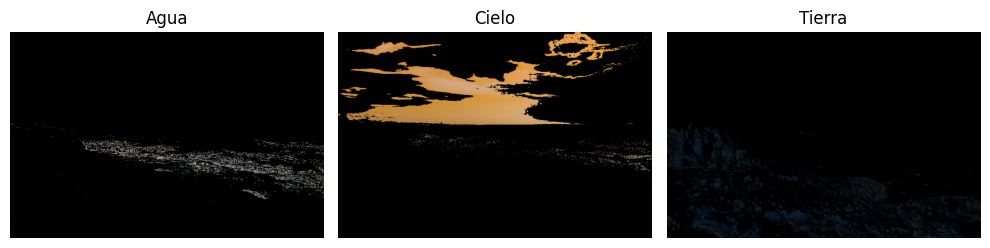

In [365]:
# Mostramos
agua_seg = cv.bitwise_and(img_seg, img_seg, mask = m_agua)
cielo_seg = cv.bitwise_and(img_seg, img_seg, mask = m_cielo)
tierra_seg = cv.bitwise_and(img_seg, img_seg, mask = m_tierra)

plt.figure(figsize=(10, 4))
plt.subplot(131)
plt.imshow(agua_seg)
plt.title("Agua")
plt.axis('off')

plt.subplot(132)
plt.imshow(cielo_seg)
plt.title("Cielo")
plt.axis('off')

plt.subplot(133)
plt.imshow(tierra_seg)
plt.title("Tierra")
plt.axis('off')

plt.tight_layout()
plt.show()